In [19]:
!pip install textblob==0.9.0

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 640.8/640.8 kB 39.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import numpy as np
import json
import re
from nltk import word_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import html
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import seaborn as sns

In [11]:
harris_file = "harris_timeline.json"

with open(harris_file, 'r') as file:
    harris_data = json.load(file)

In [ ]:
harris_data[0]

In [13]:
df_harris = pd.DataFrame([t['created_at'] for t in harris_data], columns=['create_time'])
df_harris['text'] = [t['text'] for t in harris_data]
df_harris['retweets'] = [t['retweet_count'] for t in harris_data]
df_harris['favorites'] = [t['favorite_count'] for t in harris_data]

In [14]:
df_harris.head()

,create_time,text,retweets,favorites
0,Thu Oct 22 00:41:00 +0000 2020,We're just days away from the end of the elect...,733,4221
1,Wed Oct 21 23:29:52 +0000 2020,545 children. \n\nThis is outrageous and a sta...,3100,17262
2,Wed Oct 21 22:51:39 +0000 2020,This is our moment to do something for our fam...,982,5514
3,Wed Oct 21 21:47:21 +0000 2020,.@BarackObama knows that the election is happe...,1621,9163
4,Wed Oct 21 20:21:01 +0000 2020,RT @JoeBiden: Tune in as @BarackObama sits dow...,4097,0


In [34]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to \\graddirs.cs.odu.edu\Gra
[nltk_data]     d\cs_mibra004\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to \\graddirs.cs.odu.edu\Grad\cs
[nltk_data]     _mibra004\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
import string


stop_words = set(stopwords.words('english'))

def text_cleanup(c):
    clean_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', c)))
    clean_noemoji = clean_unesc.encode('ascii', 'ignore').decode('ascii')
    wt = word_tokenize(clean_noemoji.lower())
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    return ' '.join(wt_filt)

def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

In [36]:
df_harris['text_clean'] = df_harris['text'].apply(text_cleanup)
df_harris['polarity'] = df_harris['text_clean'].apply(sentim_polarity)
df_harris['subjectivity'] = df_harris['text_clean'].apply(sentim_subject)
df_harris

,create_time,text,retweets,favorites,text_clean,polarity,subjectivity
0,Thu Oct 22 00:41:00 +0000 2020,We're just days away from the end of the elect...,733,4221,days away end election help us bring home dona...,0.000000,0.000000
1,Wed Oct 21 23:29:52 +0000 2020,545 children. \n\nThis is outrageous and a sta...,3100,17262,545 children outrageous stain national charact...,-1.000000,1.000000
2,Wed Oct 21 22:51:39 +0000 2020,This is our moment to do something for our fam...,982,5514,moment something families communities country ...,0.000000,0.000000
3,Wed Oct 21 21:47:21 +0000 2020,.@BarackObama knows that the election is happe...,1621,9163,barackobama knows election happening right win...,0.392857,0.642857
4,Wed Oct 21 20:21:01 +0000 2020,RT @JoeBiden: Tune in as @BarackObama sits dow...,4097,0,rt joebiden tune barackobama sits community le...,0.000000,0.000000
...,...,...,...,...,...,...,...
195,Fri Oct 02 20:04:59 +0000 2020,"RT @JoeBiden: Tonight, @BarackObama, @KamalaHa...",5771,0,rt joebiden tonight barackobama kamalaharris m...,0.000000,0.000000
196,Fri Oct 02 17:47:11 +0000 2020,Both @DouglasEmhoff and I were tested for COVI...,18351,181235,douglasemhoff tested morning thankfully tested...,-0.300000,0.400000
197,Fri Oct 02 16:31:50 +0000 2020,RT @JoeBiden: I’m happy to report that Jill an...,135093,0,rt joebiden im happy report jill tested negati...,0.250000,0.700000
198,Fri Oct 02 13:17:04 +0000 2020,Doug and I join Joe Biden and Dr. Biden in wis...,13727,176398,doug join joe biden biden wishing president tr...,0.300000,0.441667


In [37]:
df_harris_post = df_harris[['create_time', 'retweets', 'favorites']]
df_harris_post.head()



,create_time,retweets,favorites
0,Thu Oct 22 00:41:00 +0000 2020,733,4221
1,Wed Oct 21 23:29:52 +0000 2020,3100,17262
2,Wed Oct 21 22:51:39 +0000 2020,982,5514
3,Wed Oct 21 21:47:21 +0000 2020,1621,9163
4,Wed Oct 21 20:21:01 +0000 2020,4097,0
...,...,...,...
195,Fri Oct 02 20:04:59 +0000 2020,5771,0
196,Fri Oct 02 17:47:11 +0000 2020,18351,181235
197,Fri Oct 02 16:31:50 +0000 2020,135093,0
198,Fri Oct 02 13:17:04 +0000 2020,13727,176398


In [39]:
biden_time_list = pd.to_datetime(df_harris_post['create_time'], format='%a %b %d %H:%M:%S +0000 %Y')
df_harris_post = df_harris_post.assign(create_time=biden_time_list)
biden_hour_list = df_harris_post['create_time'].dt.strftime('%H')
df_harris_post = df_harris_post.assign(create_hour=biden_hour_list)
harris_post_avg = df_harris_post.groupby('create_hour').mean().round(2)
harris_post_avg

C:\Users\cs_mibra004\AppData\Local\Temp\ipykernel_44096\3629368307.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  harris_post_avg = df_harris_post.groupby('create_hour').mean().round(2)


,retweets,favorites
create_hour,,
00,15823.29,32153.86
01,14325.94,80103.03
02,13629.10,73177.80
03,13693.00,99270.00
12,16020.00,134929.00
13,20083.13,100992.40
14,11301.67,87903.44
15,18204.55,33754.27
16,26180.50,25650.50


In [40]:
harris_max_retweets = harris_post_avg.loc[:, 'retweets'].max()
harris_max_likes = harris_post_avg.loc[:, 'favorites'].max()
harris_post_avg['retweet_percent'] = (harris_post_avg['retweets'] / harris_max_retweets).round(2)
harris_post_avg['like_percent'] = (harris_post_avg['favorites'] / harris_max_likes).round(2)
harris_post_avg.head()

,retweets,favorites,retweet_percent,like_percent
create_hour,,,,
00,15823.29,32153.86,0.60,0.24
01,14325.94,80103.03,0.55,0.59
02,13629.10,73177.80,0.52,0.54
03,13693.00,99270.00,0.52,0.74
12,16020.00,134929.00,0.61,1.00


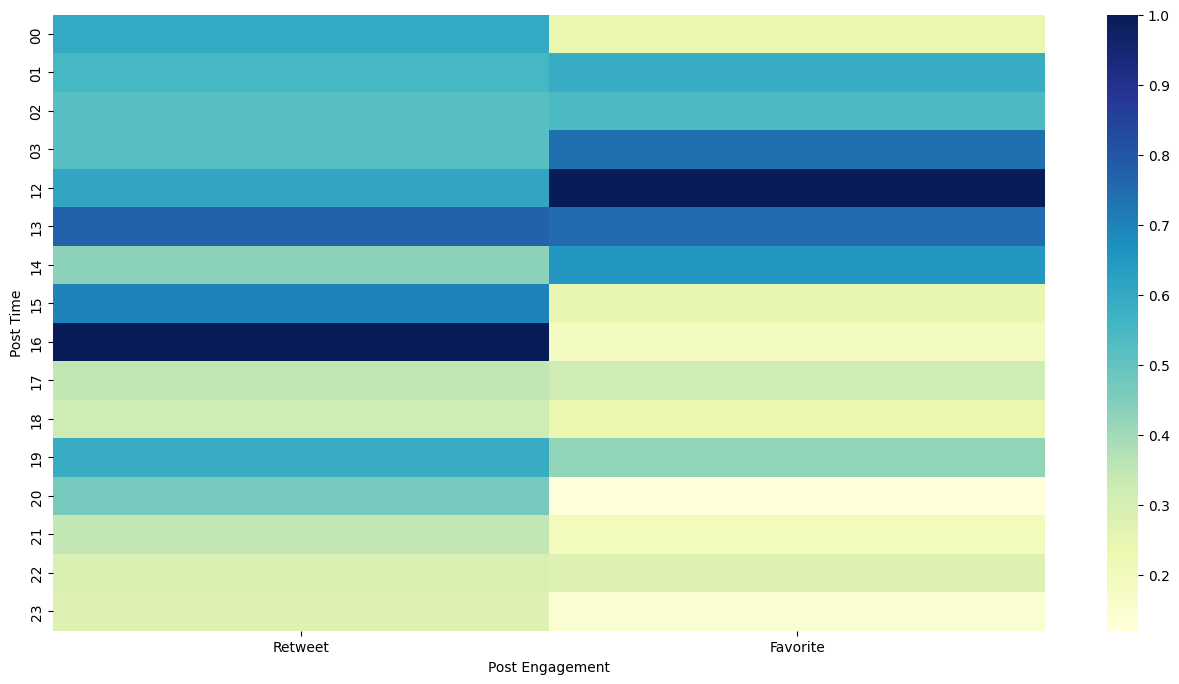

In [42]:
biden_post_heatmap = harris_post_avg[['retweet_percent', 'like_percent']]
plt.subplots(figsize=(16, 8))
g = sns.heatmap(biden_post_heatmap, cmap = 'YlGnBu')
g.set_xticklabels(['Retweet','Favorite'])
plt.xlabel('Post Engagement')
plt.ylabel('Post Time')
plt.show()

In [57]:
!python.exe -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.8/1.8 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [65]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return "positive" if blob.sentiment.polarity > 0 else "negative" if blob.sentiment.polarity < 0 else "neutral"

df_harris['sentiment_2'] = df_harris['text_clean'].apply(analyze_sentiment)

In [66]:
df_harris['sentiment_2'].head()

0     neutral
1    negative
2     neutral
3    positive
4     neutral
Name: sentiment_2, dtype: object

In [67]:
df_harris['keywords'] = df_harris['text_clean'].apply(lambda x: "policy" if "policy" in x else "other")

In [71]:
df_harris['sentiment_2'].value_counts()

neutral     99
positive    79
negative    22
Name: sentiment_2, dtype: int64

In [69]:
df_harris.head()

,create_time,text,retweets,favorites,text_clean,polarity,subjectivity,sentiment_2,keywords
0,Thu Oct 22 00:41:00 +0000 2020,We're just days away from the end of the elect...,733,4221,days away end election help us bring home dona...,0.000000,0.000000,neutral,other
1,Wed Oct 21 23:29:52 +0000 2020,545 children. \n\nThis is outrageous and a sta...,3100,17262,545 children outrageous stain national charact...,-1.000000,1.000000,negative,other
2,Wed Oct 21 22:51:39 +0000 2020,This is our moment to do something for our fam...,982,5514,moment something families communities country ...,0.000000,0.000000,neutral,other
3,Wed Oct 21 21:47:21 +0000 2020,.@BarackObama knows that the election is happe...,1621,9163,barackobama knows election happening right win...,0.392857,0.642857,positive,other
4,Wed Oct 21 20:21:01 +0000 2020,RT @JoeBiden: Tune in as @BarackObama sits dow...,4097,0,rt joebiden tune barackobama sits community le...,0.000000,0.000000,neutral,other


In [73]:
df_harris = df_harris.drop(columns='keywords')